In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 1. change the close value to open value
# 2. dataset which only have close value, then shift one day.
# 3. random forest gini value
# 4. t-statistics table
# 5. heat map
# 

In [3]:
# loading data

# create different dfs
data_file = "./AUD VS JPY.xlsx"

sheet_list = list(range(9))
print(sheet_list)
count  = 0
df = []
for sheet in sheet_list:
    df.append(pd.read_excel(data_file,sheet_name = sheet))

# adding more data columns

# include SHSZ
# dfile = "./Credit_Suisse_Case_Competition/SHSZ.xlsx"

# for sheet in range(2):
#     #print(sheet)
#     df.append(pd.read_excel(dfile,sheet_name = sheet))

# include data
#d_file = "./Credit_Suisse_Case_Competition/SOYB.csv"
d_file = "./SOYB.csv"
print(d_file)
df.append(pd.read_csv(d_file))
# print(df[-1].head())
df[-1] = df[-1][['Date','Open']]
df[-1].columns = ['Date','Soy_Open']
print(df[-1])

# include gold
#gold_price_file = "./Credit_Suisse_Case_Competition/gold_price.csv"
gold_price_file = "./gold_price.csv"
print(gold_price_file)
df.append(pd.read_csv(gold_price_file))
# print(df[-1].head())
df[-1].columns = ['Date','Gold Value']
print(df[-1].head())

# include oil
#oil_file = "./Credit_Suisse_Case_Competition/Crude_Oil_Price_WTI.xls"
oil_file = "./Crude_Oil_Price_WTI.xls"
print(oil_file)
df.append(pd.read_excel(oil_file))
# print(df[-1].head())
df[-1].columns = ['Date','Oil Price']
print(df[-1].head())

# include #################
#indexpc_file = "./Credit_Suisse_Case_Competition/indexpc.csv"
indexpc_file = "./indexpc.csv"
print("1")

df.append(pd.read_csv(indexpc_file,skiprows = 2))
df[-1] = df[-1][['DATE','TOTAL','P/C Ratio']]
df[-1].columns = ['Date','Total of indexpc','P/C Ratio of indexpc']
print(df[-1].head())
# 
equitypc_file = "./equitypc.csv"
#equitypc_file = "./Credit_Suisse_Case_Competition/equitypc.csv"
print("2")
df.append(pd.read_csv(equitypc_file,skiprows = 2))
# print(df[-1].head())
df[-1] = df[-1][['DATE','TOTAL','P/C Ratio']]
df[-1].columns = ['Date','Total of equitypc','P/C Ratio of equitpc']
print(df[-1].head())
# 
#etppc_file = "./Credit_Suisse_Case_Competition/etppc.csv"
etppc_file = "./etppc.csv"
print("3")
df.append(pd.read_csv(etppc_file,skiprows = 2))
# print(df[-1].head())
df[-1] = df[-1][['DATE','TOTAL','P/C Ratio']]
df[-1].columns = ['Date','Total of etcpc','P/C Ratio of etcpc']

print(df[-1].head())

# vix
#vixpc = "./Credit_Suisse_Case_Competition/vixpc.csv"
vixpc = "./vixpc.csv"
print("4")
df.append(pd.read_csv(vixpc,skiprows = 1))
# print(df[-1].head())
df[-1] = df[-1][['Date','VIX Put/Call Ratio','Total VIX Options Volume']]
print(df[-1].head())

# Google Search Word
#google = "./Credit_Suisse_Case_Competition/SVITerms.csv"
google = "./SVITerms.xlsx"
print("5")
df.append(pd.read_excel(google))
print(df[-1].columns)
df[-1] = df[-1][['date','crisis','war', 'credit','euro','trump','happy','federal','fear','love','travel','restaurant','car','interest','debt','stock']]
df[-1].columns = ['Date','crisis','war', 'credit','euro','trump','happy','federal','fear','love','travel','restaurant','car','interest','debt','stock']
print(df[-1].head())

# 5y5y
#google = "./Credit_Suisse_Case_Competition/SVITerms.csv"
y5y = "./5y5y.csv"
print("6")
df.append(pd.read_csv(y5y))
print(df[-1].columns)
df[-1] = df[-1][['date','y5y']]
df[-1].columns = ['Date','5y5y']
print(df[-1].head())

# Dow Jones
#google = "./Credit_Suisse_Case_Competition/SVITerms.csv"
dow = "./Dow.csv"
print("7")
df.append(pd.read_csv(dow))
print(df[-1].columns)
df[-1] = df[-1][['Date','Dow_Jones']]
df[-1].columns = ['Date','Dow Jones']
print(df[-1].head())



[0, 1, 2, 3, 4, 5, 6, 7, 8]
./SOYB.csv
            Date   Soy_Open
0     2011-09-19  24.549999
1     2011-09-20  24.990000
2     2011-09-21  24.959999
3     2011-09-22  24.000000
4     2011-09-23  24.430000
5     2011-09-26  23.320000
6     2011-09-27  23.480000
7     2011-09-28  23.260000
8     2011-09-29  22.830000
9     2011-09-30  22.600000
10    2011-10-03  22.010000
11    2011-10-04  21.959999
12    2011-10-05  21.690001
13    2011-10-06  22.090000
14    2011-10-07  21.719999
15    2011-10-10  22.180000
16    2011-10-11  21.920000
17    2011-10-12  22.730000
18    2011-10-13  22.950001
19    2011-10-14  24.400000
20    2011-10-17  22.799999
21    2011-10-18  22.770000
22    2011-10-19  23.040001
23    2011-10-20  22.700001
24    2011-10-21  22.840000
25    2011-10-24  22.850000
26    2011-10-25  22.719999
27    2011-10-26  22.510000
28    2011-10-27  22.719999
29    2011-10-28  22.990000
...          ...        ...
1995  2019-08-23  14.870000
1996  2019-08-26  14.940000
1997  201

In [4]:
count = 0
for i in df:
    print("##############"+str(count)+"###############")
    if count == 8:
        print(i.columns)
#         i = i.rename(columns={"Effective date ": "Date"},inplace = True)
        i.columns = ['Date','S&P 500 1M Realized Vol']
#     print(i.head())
    i['Date'] = pd.to_datetime(i['Date']).dt.strftime('%Y-%m-%d')
    i.set_index('Date',inplace = True)
    i.sort_index(inplace = True)
    print(i.head())
    count +=1

##############0###############
            Last Price
Date                  
2009-10-01      77.927
2009-10-02      77.709
2009-10-05      78.604
2009-10-06      79.094
2009-10-07      78.963
##############1###############
            Last Price
Date                  
2009-10-01      0.6875
2009-10-02      0.6860
2009-10-05      0.6827
2009-10-06      0.6792
2009-10-07      0.6806
##############2###############
            Last Price
Date                  
2009-10-01      6.8265
2009-10-02      6.8264
2009-10-05      6.8264
2009-10-06      6.8263
2009-10-07      6.8265
##############3###############
            Ask Price
Date                 
2011-09-09     132.25
2011-09-12     135.75
2011-09-13     132.25
2011-09-14     129.75
2011-09-15     125.75
##############4###############
            Last Price
Date                  
2009-10-01      0.8654
2009-10-02      0.8648
2009-10-05      0.8726
2009-10-06      0.9043
2009-10-07      0.8563
##############5###############
            Last

In [5]:
df[7] = df[7][['Open']]
df[7].columns = ['EMM_Open']

In [6]:
print(df[8].head())

            S&P 500 1M Realized Vol
Date                               
2010-08-31                    16.42
2010-09-01                    19.20
2010-09-02                    19.34
2010-09-03                    19.86
2010-09-07                    20.22


In [7]:
# df[7]['Diff'] = df[7]['High'] - df[7]['Low']

In [8]:
# print(df[7].head())

In [9]:
# plt.figure(figsize = (20,10))
# plt.plot(df[7].Date,df[7].Diff)

In [10]:
# plt.hist(df[7]['Diff'])

In [11]:
# # df
# print(df[6].head())
# df[6] = df[6].to_frame()
# df[7] = df[7].to_frame()
# merge table, rename
print(df[6].head())

df[6] = df[6]['Open'].to_frame()
# df[7] = df[7].to_frame()

df[0].columns=['AUD_vs_JPY_Open']
df[1].columns = ['USD_vs_EUR_Open']
df[2].columns = ['USD_vs_CNY_Open']
df[3].columns = ['CDX_IG_5Y_Ask']
df[4].columns = ['US_2Y_Yield_Open']
df[5].columns = ['US_10Y_Yield_Open']
df[6].columns = ['S&P_500_index']
df[7].columns = ['EEM']
print(df[8].head())
df[8].columns = ['SPX_1M_Realized_Vol']

# 
print(df[6])

               Open     High      Low    Close
Date                                          
2009-10-01  1054.91  1054.91  1029.45  1029.85
2009-10-02  1029.71  1030.60  1019.95  1025.21
2009-10-05  1026.87  1042.58  1025.92  1040.45
2009-10-06  1042.02  1060.55  1042.02  1054.72
2009-10-07  1053.65  1058.02  1050.10  1057.58
            S&P 500 1M Realized Vol
Date                               
2010-08-31                    16.42
2010-09-01                    19.20
2010-09-02                    19.34
2010-09-03                    19.86
2010-09-07                    20.22
            S&P_500_index
Date                     
2009-10-01        1054.91
2009-10-02        1029.71
2009-10-05        1026.87
2009-10-06        1042.02
2009-10-07        1053.65
2009-10-08        1060.03
2009-10-09        1065.28
2009-10-12        1071.63
2009-10-13        1074.96
2009-10-14        1078.68
2009-10-15        1090.36
2009-10-16        1094.67
2009-10-19        1088.22
2009-10-20        1098.64
200

In [12]:
# shifting the close value
shift_list = [0,1,2,4,5]
for i in shift_list:
    df[i] = df[i].shift(periods = 1)
    print(df[i].head())

            AUD_vs_JPY_Open
Date                       
2009-10-01              NaN
2009-10-02           77.927
2009-10-05           77.709
2009-10-06           78.604
2009-10-07           79.094
            USD_vs_EUR_Open
Date                       
2009-10-01              NaN
2009-10-02           0.6875
2009-10-05           0.6860
2009-10-06           0.6827
2009-10-07           0.6792
            USD_vs_CNY_Open
Date                       
2009-10-01              NaN
2009-10-02           6.8265
2009-10-05           6.8264
2009-10-06           6.8264
2009-10-07           6.8263
            US_2Y_Yield_Open
Date                        
2009-10-01               NaN
2009-10-02            0.8654
2009-10-05            0.8648
2009-10-06            0.8726
2009-10-07            0.9043
            US_10Y_Yield_Open
Date                         
2009-10-01                NaN
2009-10-02             3.1790
2009-10-05             3.2188
2009-10-06             3.2205
2009-10-07             3.2552

In [13]:
df1 = df[0]
for i in range(1,len(df)):
    df1 = df1.merge(df[i],how="inner",left_on=df1.index, right_on=df[i].index).set_index('key_0')
#     print(df1.head())

In [14]:
print(df1.head())

            AUD_vs_JPY_Open  USD_vs_EUR_Open  USD_vs_CNY_Open  CDX_IG_5Y_Ask  \
key_0                                                                          
2011-09-19           79.561           0.7246           6.3836        128.125   
2011-09-20           78.288           0.7306           6.3867        134.500   
2011-09-21           78.566           0.7299           6.3840        141.750   
2011-09-22           76.761           0.7368           6.3818        145.500   
2011-09-23           74.266           0.7427           6.3878        142.500   

            US_2Y_Yield_Open  US_10Y_Yield_Open  S&P_500_index    EEM  \
key_0                                                                   
2011-09-19            0.1652             2.0479        1214.99  39.10   
2011-09-20            0.1532             1.9506        1204.50  39.48   
2011-09-21            0.1613             1.9385        1203.63  38.81   
2011-09-22            0.1936             1.8576        1164.55  35.81   
2

In [15]:
corr = df1.corr()
print(corr.columns)


Index(['AUD_vs_JPY_Open', 'USD_vs_EUR_Open', 'USD_vs_CNY_Open',
       'CDX_IG_5Y_Ask', 'US_2Y_Yield_Open', 'US_10Y_Yield_Open',
       'S&P_500_index', 'EEM', 'SPX_1M_Realized_Vol', 'Soy_Open', 'Gold Value',
       'Oil Price', 'Total of indexpc', 'P/C Ratio of indexpc',
       'Total of equitypc', 'P/C Ratio of equitpc', 'Total of etcpc',
       'P/C Ratio of etcpc', 'VIX Put/Call Ratio', 'Total VIX Options Volume',
       'crisis', 'war', 'credit', 'euro', 'trump', 'happy', 'federal', 'fear',
       'love', 'travel', 'restaurant', 'car', 'interest', 'debt', 'stock',
       '5y5y', 'Dow Jones'],
      dtype='object')


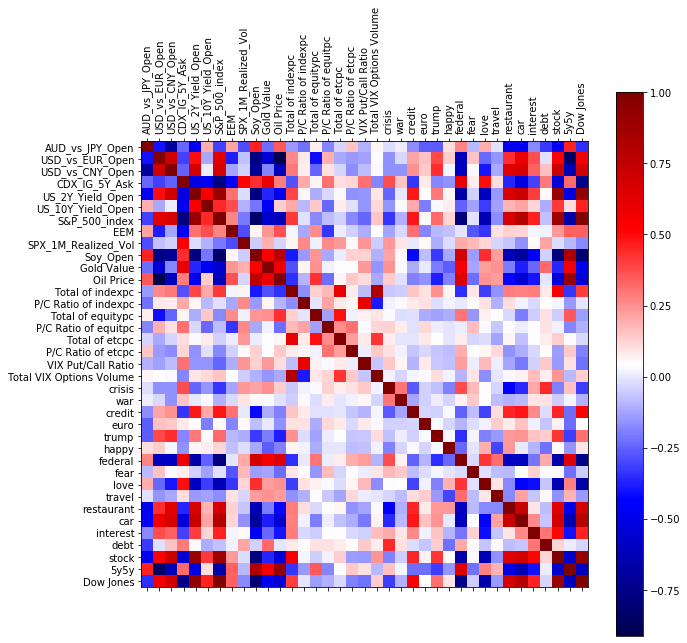

In [16]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
# fig = plt.figure(figsize=(10,4))
cax = ax.matshow(corr,cmap = "seismic")
# plt.figure(figsize=(20,20))

plt.xticks(range(len(corr.columns)),corr.columns,rotation = 90)
plt.yticks(range(len(corr.columns)),corr.columns)
fig.colorbar(cax)
# change the colormap scale
# add x axis and y axis
fig.savefig('heatmap_for_two_colors.png',bbox_inches='tight')


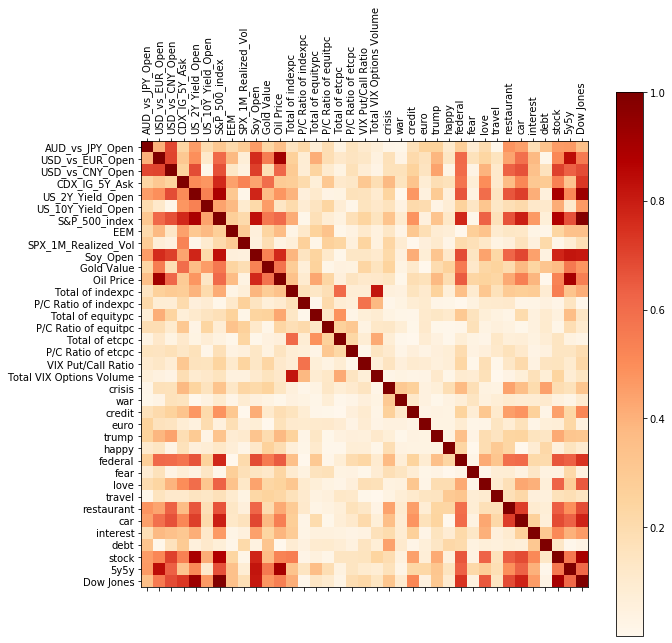

In [17]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
# fig = plt.figure(figsize=(10,4))
cax = ax.matshow(abs(corr),cmap = "OrRd")
# plt.figure(figsize=(20,20))

plt.xticks(range(len(corr.columns)),corr.columns,rotation = 90)
plt.yticks(range(len(corr.columns)),corr.columns)
fig.colorbar(cax)
fig.savefig('heatmap_for_one_colors.png',bbox_inches='tight')



In [18]:
# load dependent var data---vix data
vix_file = "./VIX_INDEX.xlsx"
vix = pd.read_excel(vix_file)

In [19]:
print(vix.head())

        Date      Close
0 2009-01-02  39.189999
1 2009-01-05  39.080002
2 2009-01-06  38.560001
3 2009-01-07  43.389999
4 2009-01-08  42.560001


In [20]:
vix.columns = ['key_0','VIXCLS']
vix.set_index('key_0',inplace = True)

In [21]:
print(vix.head())
print(df1.head())
# df1.merge(vix,how="inner",left_on = df1.index,right_on = vix.index)
print(df1.index)

               VIXCLS
key_0                
2009-01-02  39.189999
2009-01-05  39.080002
2009-01-06  38.560001
2009-01-07  43.389999
2009-01-08  42.560001
            AUD_vs_JPY_Open  USD_vs_EUR_Open  USD_vs_CNY_Open  CDX_IG_5Y_Ask  \
key_0                                                                          
2011-09-19           79.561           0.7246           6.3836        128.125   
2011-09-20           78.288           0.7306           6.3867        134.500   
2011-09-21           78.566           0.7299           6.3840        141.750   
2011-09-22           76.761           0.7368           6.3818        145.500   
2011-09-23           74.266           0.7427           6.3878        142.500   

            US_2Y_Yield_Open  US_10Y_Yield_Open  S&P_500_index    EEM  \
key_0                                                                   
2011-09-19            0.1652             2.0479        1214.99  39.10   
2011-09-20            0.1532             1.9506        1204.50  39

In [22]:
df1.index = pd.to_datetime(df1.index)
#vix.index = pd.to_datetime(vix.index)
df1 = df1.merge(vix,how="inner",left_on = df1.index,right_on = vix.index)


In [23]:
print(df1['VIXCLS'])
print(df1.columns)

0       32.730000
1       32.860001
2       37.320000
3       41.349998
4       41.250000
5       39.020000
6       37.709999
7       41.080002
8       38.840000
9       42.959999
10      45.450001
11      40.820000
12      37.810001
13      36.270000
14      36.200001
15      32.860001
16      31.260000
17      30.700001
18      28.240000
19      33.389999
20      31.559999
21      34.439999
22      34.779999
23      31.320000
24      29.260000
25      32.220001
26      29.860001
27      25.459999
28      24.530001
29      29.959999
          ...    
1904    16.879999
1905    17.500000
1906    15.800000
1907    16.680000
1908    19.870001
1909    19.320000
1910    20.309999
1911    19.350000
1912    17.879999
1913    18.980000
1914    19.660000
1915    17.330000
1916    16.270000
1917    15.000000
1918    15.270000
1919    15.200000
1920    14.610000
1921    14.220000
1922    13.740000
1923    14.670000
1924    14.440000
1925    13.950000
1926    14.050000
1927    15.320000
1928    14

In [24]:
df3 = df1[['crisis', 'war', 'credit', 'euro', 'trump', 'happy', 'federal', 'fear',
       'love', 'travel', 'restaurant', 'car', 'interest', 'debt', 'stock','VIXCLS']]
df3.head()

,crisis,war,credit,euro,trump,happy,federal,fear,love,travel,restaurant,car,interest,debt,stock,VIXCLS
0,40.210987,60.455764,88.174950,13.454039,1.001164,38.605898,90.957447,37.083812,83.986175,42.778793,59.034916,64.526278,69.052369,67.870509,43.915828,32.730000
1,39.327229,72.252011,88.174950,13.259053,1.012806,39.571046,87.127660,35.774971,83.986175,41.067642,62.142016,61.094029,70.997506,72.979042,45.013724,32.860001
2,38.443471,67.091153,86.170974,13.064067,1.024447,39.571046,90.000000,35.774971,83.986175,40.639854,62.142016,61.780479,72.942643,65.681138,46.660567,37.320000
3,40.652866,63.404826,85.168986,13.454039,0.977881,41.501340,92.872340,36.211251,87.096774,38.928702,65.249117,61.780479,79.750623,65.681138,54.894785,41.349998
4,38.885350,61.193029,87.172962,13.064067,1.024447,42.466488,85.212766,35.338691,88.133641,36.789762,73.793645,63.153379,97.256858,64.221557,51.052150,41.250000


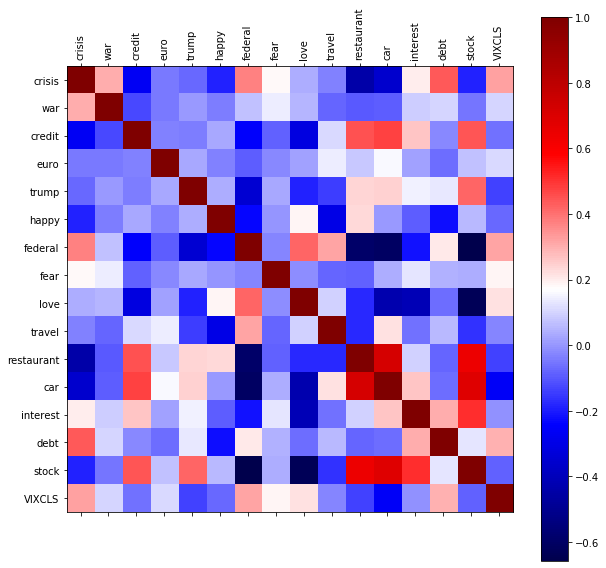

In [25]:
corr = df3.corr()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
# fig = plt.figure(figsize=(10,4))
cax = ax.matshow(corr,cmap = "seismic")
# plt.figure(figsize=(20,20))

plt.xticks(range(len(corr.columns)),corr.columns,rotation = 90)
plt.yticks(range(len(corr.columns)),corr.columns)
fig.colorbar(cax)
# change the colormap scale
# add x axis and y axis
fig.savefig('two.png',bbox_inches='tight')

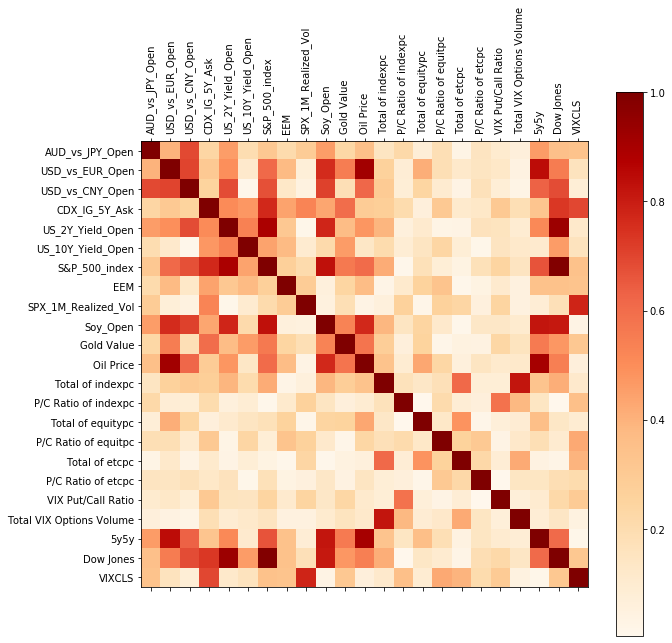

In [74]:
# print
df1 = df1[remain_list+['VIXCLS']]
corr = df1.corr()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
# fig = plt.figure(figsize=(10,4))
cax = ax.matshow(abs(corr),cmap = "OrRd")
# plt.figure(figsize=(20,20))

plt.xticks(range(len(corr.columns)),corr.columns,rotation = 90)
plt.yticks(range(len(corr.columns)),corr.columns)
fig.colorbar(cax)
fig.savefig('All_one.png',bbox_inches='tight')

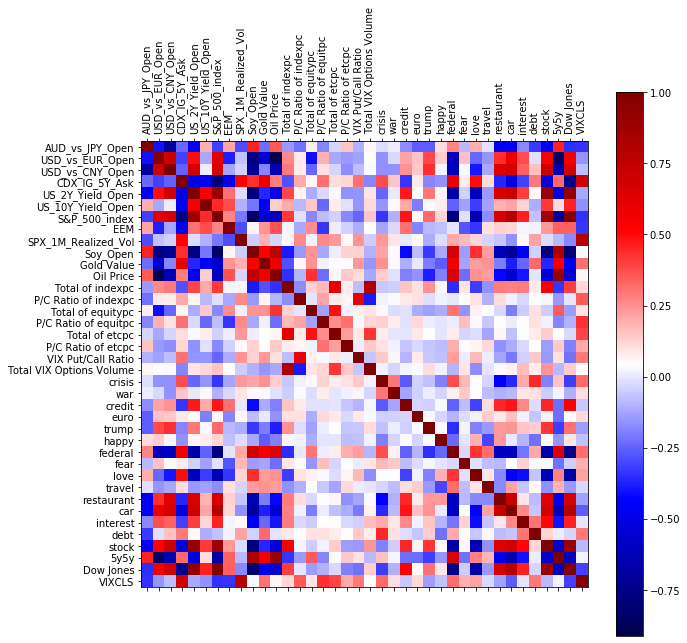

In [27]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
# fig = plt.figure(figsize=(10,4))
cax = ax.matshow(corr,cmap = "seismic")
# plt.figure(figsize=(20,20))

plt.xticks(range(len(corr.columns)),corr.columns,rotation = 90)
plt.yticks(range(len(corr.columns)),corr.columns)
fig.colorbar(cax)
# change the colormap scale
# add x axis and y axis
fig.savefig('two.png',bbox_inches='tight')

In [28]:
# start using linear regression-with vix
from sklearn.linear_model import LinearRegression
print(df1.columns)
print(df1.head())

Index(['key_0', 'AUD_vs_JPY_Open', 'USD_vs_EUR_Open', 'USD_vs_CNY_Open',
       'CDX_IG_5Y_Ask', 'US_2Y_Yield_Open', 'US_10Y_Yield_Open',
       'S&P_500_index', 'EEM', 'SPX_1M_Realized_Vol', 'Soy_Open', 'Gold Value',
       'Oil Price', 'Total of indexpc', 'P/C Ratio of indexpc',
       'Total of equitypc', 'P/C Ratio of equitpc', 'Total of etcpc',
       'P/C Ratio of etcpc', 'VIX Put/Call Ratio', 'Total VIX Options Volume',
       'crisis', 'war', 'credit', 'euro', 'trump', 'happy', 'federal', 'fear',
       'love', 'travel', 'restaurant', 'car', 'interest', 'debt', 'stock',
       '5y5y', 'Dow Jones', 'VIXCLS'],
      dtype='object')
       key_0  AUD_vs_JPY_Open  USD_vs_EUR_Open  USD_vs_CNY_Open  \
0 2011-09-19           79.561           0.7246           6.3836   
1 2011-09-20           78.288           0.7306           6.3867   
2 2011-09-21           78.566           0.7299           6.3840   
3 2011-09-22           76.761           0.7368           6.3818   
4 2011-09-23       

In [29]:
 df1.corr()

,AUD_vs_JPY_Open,USD_vs_EUR_Open,USD_vs_CNY_Open,CDX_IG_5Y_Ask,US_2Y_Yield_Open,US_10Y_Yield_Open,S&P_500_index,EEM,SPX_1M_Realized_Vol,Soy_Open,...,love,travel,restaurant,car,interest,debt,stock,5y5y,Dow Jones,VIXCLS
AUD_vs_JPY_Open,1.000000,-0.399249,-0.692490,-0.234435,-0.455982,0.196231,-0.309071,0.210511,-0.288890,0.458178,...,0.197560,-0.009567,-0.478364,-0.448864,-0.179155,-0.326222,-0.460435,0.461137,-0.349028,-0.338620
USD_vs_EUR_Open,-0.399249,1.000000,0.701017,-0.306501,0.495727,-0.116117,0.613048,-0.375535,-0.072662,-0.759353,...,-0.234860,-0.149586,0.434553,0.588437,0.377698,-0.010153,0.517812,-0.841821,0.555350,-0.156851
USD_vs_CNY_Open,-0.692490,0.701017,1.000000,-0.249634,0.683029,0.011721,0.674092,-0.125253,-0.043844,-0.711802,...,-0.392817,-0.112954,0.631538,0.668593,0.342332,0.157271,0.708305,-0.632892,0.682225,-0.078935
CDX_IG_5Y_Ask,-0.234435,-0.306501,-0.249634,1.000000,-0.507115,-0.472937,-0.768908,-0.443421,0.527738,0.434834,...,0.496516,0.110364,-0.364089,-0.518439,-0.308522,0.294584,-0.535252,0.325257,-0.732173,0.694101
US_2Y_Yield_Open,-0.455982,0.495727,0.683029,-0.507115,1.000000,0.537903,0.891660,0.311492,-0.015663,-0.775511,...,-0.599800,-0.148161,0.657639,0.713752,0.406725,0.056927,0.896885,-0.511812,0.926303,-0.117941
US_10Y_Yield_Open,0.196231,-0.116117,0.011721,-0.472937,0.537903,1.000000,0.440911,0.376257,-0.100641,-0.212629,...,-0.317324,-0.132038,0.179124,0.210990,0.119801,-0.111620,0.411227,0.107820,0.461081,-0.158128
S&P_500_index,-0.309071,0.613048,0.674092,-0.768908,0.891660,0.440911,1.000000,0.269914,-0.207548,-0.831677,...,-0.629054,-0.164693,0.667217,0.791815,0.461383,-0.069489,0.877654,-0.669505,0.989587,-0.341940
EEM,0.210511,-0.375535,-0.125253,-0.443421,0.311492,0.376257,0.269914,1.000000,-0.290075,0.059584,...,-0.334572,0.098873,0.132461,0.124635,0.025403,0.015732,0.234589,0.340298,0.340462,-0.332396
SPX_1M_Realized_Vol,-0.288890,-0.072662,-0.043844,0.527738,-0.015663,-0.100641,-0.207548,-0.290075,1.000000,-0.052221,...,0.122660,-0.035177,-0.061043,-0.158036,0.053525,0.211594,-0.016140,-0.085663,-0.177450,0.780947
Soy_Open,0.458178,-0.759353,-0.711802,0.434834,-0.775511,-0.212629,-0.831677,0.059584,-0.052221,1.000000,...,0.438887,0.225657,-0.620628,-0.692861,-0.445225,-0.039673,-0.775301,0.817740,-0.810600,0.034985


In [30]:
df1.set_index('key_0',inplace = True)

In [31]:
# calculate the size
train_size = int(0.6*len(df1))
test_size = int(0.4*len(df1))

In [32]:
# train size
x = df1.iloc[:train_size,:-1]
y = df1.iloc[:train_size,-1]

In [33]:
# test size
x_test = df1.iloc[train_size:,:-1]
y_test = df1.iloc[train_size:,-1]


In [34]:
# # set index
# print(x.head())
# print(y.head())
# print(x_test.head())
# print(y_test.head())

In [35]:
# dif of the matrix
dif1 = (df1 - df1.shift(1))#/df1
print(df1.head())
print(dif1.head())
dif = dif1.iloc[1:]
print(dif.head())
print(df1.columns)
# dif is the delta_data, and df1 is the data

            AUD_vs_JPY_Open  USD_vs_EUR_Open  USD_vs_CNY_Open  CDX_IG_5Y_Ask  \
key_0                                                                          
2011-09-19           79.561           0.7246           6.3836        128.125   
2011-09-20           78.288           0.7306           6.3867        134.500   
2011-09-21           78.566           0.7299           6.3840        141.750   
2011-09-22           76.761           0.7368           6.3818        145.500   
2011-09-23           74.266           0.7427           6.3878        142.500   

            US_2Y_Yield_Open  US_10Y_Yield_Open  S&P_500_index    EEM  \
key_0                                                                   
2011-09-19            0.1652             2.0479        1214.99  39.10   
2011-09-20            0.1532             1.9506        1204.50  39.48   
2011-09-21            0.1613             1.9385        1203.63  38.81   
2011-09-22            0.1936             1.8576        1164.55  35.81   
2

In [36]:
# training model, you can select that whether to apply the training result
# and we will either use the delta vix or just vix
def linear_model(data):
    # split the data set
    # cal train size and test size
    train_size = int(0.6 * len(data))
    # split, train
    train_x = data.iloc[:train_size,:-1]
    train_y = data.iloc[:train_size,-1]
    # split, test
    test_x = data.iloc[train_size:,:-1]
    test_y = data.iloc[train_size:,-1]
    # train model
    reg = LinearRegression().fit(train_x, train_y)
    # 
    coef = reg.coef_
    intercept = reg.intercept_
    return reg,coef,intercept,test_x,test_y

# test function
def test(x_test,y_test,coef,intercept):
    count = 0
    count_1 = 0
    count_half = 0
    for i in x_test.iterrows():
        features = np.array(i[1])
        val = np.dot(features.T,coef) + intercept
        if (count != 0) and (count < len(y_test)-1):
            dif = abs(val - y_test.iloc[count+1])
            if dif <=0.5:
                count_half+=1
            if dif <= 1:
                count_1+=1
        count = count + 1
    # calculate the rate
    half_rate = count_half/(len(y_test)-1)
    one_rate = count_1/(len(y_test)-1)
    return half_rate,one_rate


    

In [37]:
reg,coef,intercept,test_x,test_y= linear_model(dif)
print(coef,intercept)
# print(dif.head())
print(test_x.head())
half_rate, one_rate = test(test_x,test_y,coef,intercept)
print(half_rate,one_rate)
# print(dif.head())

[-2.88640033e-03 -8.99137668e+00 -3.31856776e+00  1.20755127e-01
  1.15875516e+00 -3.31877018e-01  5.32511188e-03 -1.20836547e-01
  9.37640313e-02 -8.12720257e-02  1.01489284e-04  9.80324808e-03
  2.57225347e-07 -1.19192637e-01 -1.39143568e-07  7.62982086e-01
  2.47175688e-07 -3.94670786e-02  9.18724641e-02 -1.63464053e-07
  5.78726120e-03 -1.35124174e-03  1.82469711e-03  2.74688768e-02
 -7.92252140e-03  2.27023712e-03  5.70411494e-03  9.64185698e-03
  1.74040262e-03  2.11152732e-02 -2.04788793e-02  1.38697447e-02
 -3.10920618e-03 -7.93542386e-03  3.33467028e-02 -3.89678685e-01
 -6.53121117e-03] 0.02339756948004274
            AUD_vs_JPY_Open  USD_vs_EUR_Open  USD_vs_CNY_Open  CDX_IG_5Y_Ask  \
key_0                                                                          
2016-06-20            0.212          -0.0040          -0.0045         -2.776   
2016-06-21            0.528          -0.0027          -0.0050         -1.588   
2016-06-22            0.533           0.0054           0.

In [38]:
# write function for time series prediction
print(df1.head())
reg_dif1,coef_df1,intercept_df1,test_x_df1,test_y_df1 = linear_model(df1)

# test value without applying feature selection
half_rate1,one_rate1 = test(test_x_df1,test_y_df1,coef_df1,intercept_df1)
print(half_rate1,one_rate1)
# test value with feature selection


            AUD_vs_JPY_Open  USD_vs_EUR_Open  USD_vs_CNY_Open  CDX_IG_5Y_Ask  \
key_0                                                                          
2011-09-19           79.561           0.7246           6.3836        128.125   
2011-09-20           78.288           0.7306           6.3867        134.500   
2011-09-21           78.566           0.7299           6.3840        141.750   
2011-09-22           76.761           0.7368           6.3818        145.500   
2011-09-23           74.266           0.7427           6.3878        142.500   

            US_2Y_Yield_Open  US_10Y_Yield_Open  S&P_500_index    EEM  \
key_0                                                                   
2011-09-19            0.1652             2.0479        1214.99  39.10   
2011-09-20            0.1532             1.9506        1204.50  39.48   
2011-09-21            0.1613             1.9385        1203.63  38.81   
2011-09-22            0.1936             1.8576        1164.55  35.81   
2

In [39]:
def delta_test(y_true,x_test,y_test,coef,intercept):
    count = 0
    count_1 = 0
    count_half = 0
    for i in x_test.iterrows():
        features = np.array(i[1])
        val = np.dot(features.T,coef) + intercept
        if (count != 0) and (count < len(y_test)):
            dif = abs(val + y_true_test.iloc[count])
            if dif <=0.5:
                count_half+=1
            if dif <= 1:
                count_1+=1
        count = count + 1
    # calculate the rate
    half_rate = count_half/(len(y_test)-1)
    one_rate = count_1/(len(y_test)-1)
    return half_rate,one_rate


In [40]:
# feature selection with linear regression
from sklearn.feature_selection import RFECV
# from sklearn.linear_model.LinearRegression import LinearRegression
# X = df3.iloc[:,:-1]
# y = df3.iloc[:,-1]

# return features selected by the model
def feature_selection(data):
    X = data.iloc[:,:-1]
    y = data.iloc[:,-1]
    estimator = LinearRegression()
    selector = RFECV(estimator, step=1, cv=5)
    selector = selector.fit(X, y)
    rank = selector.ranking_
    k = data.columns
    l = []
    # print out features that rfe chooses
    for i in range(len(rank)):
        if rank[i] == 1:
            l.append(k[i])
    print(l)
    # return features and selector
    # for feature selection and prediction
    return l,selector

x = df1.iloc[:int(len(df1)*0.8),:]
x_test = df1.iloc[int(len(df1)*0.8):,:-1]
y_test = df1.iloc[int(len(df1)*0.8):,-1]

# delta
print(dif)
x_dif = dif.iloc[:int(len(dif)*0.8),:]
x_test_dif = dif.iloc[int(len(dif)*0.8):,:-1]
y_test_dif = dif.iloc[int(len(dif)*0.8):,-1]

print(x_test.head())
# two data as input, one is data
l,selector = feature_selection(x_dif)
# the other one is the delta data
# delta_l, delta_selector = feature_selection(dif)
# print(len(l),len(delta_l))
print(len(l))
# print(len(dif.columns))
predict = selector.predict(x_test_dif)
print(predict)
# test code, in this case, is the current day  
half = 0
one = 0
print(y_test_dif.head())
y_list = y_test_dif.values.tolist()
for i in range(1,len(predict)):
    diff = abs(y_list[i] - predict[i])
    if diff <= 0.5:
        half+=1
    if diff <= 1:
        one+=1
    half_rate = half/len(y_list)
    one_rate = one/len(y_list)

# prediction rate for dif 
print(half_rate,one_rate)
print(len(dif.columns))
print(len(l))
print(l)
# print(selector.coef_)
print(len(x_test_dif))

            AUD_vs_JPY_Open  USD_vs_EUR_Open  USD_vs_CNY_Open  CDX_IG_5Y_Ask  \
key_0                                                                          
2011-09-20           -1.273           0.0060           0.0031          6.375   
2011-09-21            0.278          -0.0007          -0.0027          7.250   
2011-09-22           -1.805           0.0069          -0.0022          3.750   
2011-09-23           -2.495           0.0059           0.0060         -3.000   
2011-09-26            0.649          -0.0020           0.0005         -5.375   
2011-09-27            0.168          -0.0018           0.0133         -0.375   
2011-09-28            1.066          -0.0031          -0.0031          5.250   
2011-09-29           -1.219           0.0025          -0.0045         -2.250   
2011-09-30            0.227          -0.0028           0.0034          5.500   
2011-10-03           -0.705           0.0113          -0.0162          6.250   
2011-10-04           -1.439           0.

['AUD_vs_JPY_Open', 'USD_vs_EUR_Open', 'USD_vs_CNY_Open', 'CDX_IG_5Y_Ask', 'US_2Y_Yield_Open', 'US_10Y_Yield_Open', 'S&P_500_index', 'EEM', 'SPX_1M_Realized_Vol', 'Soy_Open', 'Gold Value', 'Oil Price', 'Total of indexpc', 'P/C Ratio of indexpc', 'Total of equitypc', 'P/C Ratio of equitpc', 'Total of etcpc', 'P/C Ratio of etcpc', 'VIX Put/Call Ratio', 'Total VIX Options Volume', 'crisis', 'war', 'credit', 'euro', 'trump', 'happy', 'federal', 'fear', 'love', 'travel', 'restaurant', 'car', 'interest', 'debt', 'stock', '5y5y', 'Dow Jones']
37
[-4.37774817e+00 -4.22631456e-01 -1.83214151e+00  1.54944917e+00
 -1.13168664e+00 -2.47293607e+00 -2.33083669e+00  2.78012430e+00
  2.67934345e+00  3.07845267e+00 -5.65310659e-01 -2.19577857e+00
  6.91842967e-03  3.14999891e-01 -8.42671206e-01 -2.89715378e+00
  4.63527407e-01  1.25658050e+00  1.65308049e+00 -9.00659727e-01
 -9.83352989e-01  3.12051604e+00  3.31936199e-01 -2.70892559e-02
  6.15520429e+00  3.17013808e+00 -4.96395895e+00  3.34295376e+00


In [41]:
# random forest regressor
# removing the trend will enable us to predict more precisely.
# stationarility, be careful of the attributes about random forest, if the same method correct
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=3, random_state=0, n_estimators=10)

regr.fit(x.iloc[:,:-1],x.iloc[:,-1])  
print(regr.feature_importances_)
# make prediction
ypredict1= regr.predict(x_test)

regr1 = RandomForestRegressor(max_depth=3, random_state=0, n_estimators=10)
regr1.fit(x_dif.iloc[:,:-1],x_dif.iloc[:,-1])
ypredict_dif = regr1.predict(x_test_dif)

one = 0
half = 0
ylist1 = y_test.values.tolist()
ylist_dif = y_test_dif.values.tolist()
for i in range(0,len(ylist1)):
#     print(len(ylist1),len(ypredict1))
    diff = abs(ylist1[i] - ypredict1[i])
    if diff <= 0.5:
        half+=1
    if diff <= 1:
        one+=1
    half_rate = half/len(ylist1)
    one_rate = one/len(ylist1)
print("half rate for orginal data: "+ str(half_rate))
print("one rate for original data: "+str(one_rate))

half = 0
one = 0
for i in range(len(ypredict_dif)):
#     print(len(ypredict_dif),len(ylist_dif))
    diff = abs(ylist_dif[i] - ypredict_dif[i])
    if diff <= 0.5:
        half+=1
    if diff <= 1:
        one+=1
    half_dif_rate = half/len(ypredict_dif)
    one_dif_rate = one/len(ypredict_dif)
print("half rate for dif data: "+ str(half_dif_rate))
print("one rate for dif data: "+str(one_dif_rate))
print(df1.columns)


[0.01090475 0.02102928 0.00445052 0.1479622  0.         0.
 0.00818571 0.00371857 0.70573786 0.00408028 0.         0.00615185
 0.0027204  0.         0.         0.         0.00212508 0.
 0.         0.00411986 0.         0.00103287 0.00110538 0.0015421
 0.         0.00690822 0.         0.         0.         0.
 0.         0.         0.         0.         0.00208519 0.00384142
 0.06229846]
half rate for orginal data: 0.13178294573643412
one rate for original data: 0.26356589147286824
half rate for dif data: 0.4754521963824289
one rate for dif data: 0.7467700258397932
Index(['AUD_vs_JPY_Open', 'USD_vs_EUR_Open', 'USD_vs_CNY_Open',
       'CDX_IG_5Y_Ask', 'US_2Y_Yield_Open', 'US_10Y_Yield_Open',
       'S&P_500_index', 'EEM', 'SPX_1M_Realized_Vol', 'Soy_Open', 'Gold Value',
       'Oil Price', 'Total of indexpc', 'P/C Ratio of indexpc',
       'Total of equitypc', 'P/C Ratio of equitpc', 'Total of etcpc',
       'P/C Ratio of etcpc', 'VIX Put/Call Ratio', 'Total VIX Options Volume',
       

In [42]:
# train the statistical model
import statsmodels.api as sm
y = dif.iloc[:,-1]
X = dif.iloc[:,:-1]
k = sm.OLS(y, X).fit()
k.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 VIXCLS   R-squared (uncentered):                   0.710
Model:                            OLS   Adj. R-squared (uncentered):              0.704
Method:                 Least Squares   F-statistic:                              125.3
Date:                Thu, 17 Oct 2019   Prob (F-statistic):                        0.00
Time:                        23:59:59   Log-Likelihood:                         -2323.5
No. Observations:                1933   AIC:                                      4721.
Df Residuals:                    1896   BIC:                                      4927.
Df Model:                          37                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
AUD_vs_JPY_Open             -0.0164      0.035     -0.473      0.636      -0.084       0.051
USD_vs_EUR_Open             -8.9460      4.478     -1.998      0.046     -17.729      -0.163
USD_vs_CNY_Open             -3.3903      1.450     -2.338      0.019      -6.234      -0.547
CDX_IG_5Y_Ask                0.1618      0.013     12.596      0.000       0.137       0.187
US_2Y_Yield_Open             0.7969      1.023      0.779      0.436      -1.210       2.804
US_10Y_Yield_Open            0.4506      0.621      0.725      0.468      -0.768       1.669
S&P_500_index                0.0080      0.001      5.315      0.000       0.005       0.011
EEM                         -0.2258      0.052     -4.307      0.000      -0.329      -0.123
SPX_1M_Realized_Vol          0.1552      0.023      6.876      0.000       0.111       0.200
Soy_Open                    -0.1037      0.055     -1.903      0.057      -0.211       0.003
Gold Value                   0.0012      0.001      0.871      0.384      -0.002       0.004
Oil Price                   -0.0014      0.015     -0.089      0.929      -0.031       0.029
Total of indexpc          2.901e-07   7.69e-08      3.774      0.000    1.39e-07    4.41e-07
P/C Ratio of indexpc        -0.1754      0.101     -1.742      0.082      -0.373       0.022
Total of equitypc        -1.523e-07   8.63e-08     -1.764      0.078   -3.22e-07     1.7e-08
P/C Ratio of equitpc         0.4979      0.221      2.248      0.025       0.063       0.932
Total of etcpc            2.963e-07   7.62e-08      3.890      0.000    1.47e-07    4.46e-07
P/C Ratio of etcpc          -0.0346      0.047     -0.740      0.459      -0.126       0.057
VIX Put/Call Ratio           0.0851      0.080      1.070      0.285      -0.071       0.241
Total VIX Options Volume -2.969e-07   1.12e-07     -2.648      0.008   -5.17e-07    -7.7e-08
crisis                       0.0084      0.007      1.191      0.234      -0.005       0.022
war                          0.0054      0.004      1.350      0.177      -0.002       0.013
credit                      -0.0030      0.005     -0.577      0.564      -0.013       0.007
euro                         0.0167      0.004      4.187      0.000       0.009       0.025
trump                       -0.0072      0.001     -6.583      0.000      -0.009      -0.005
happy                        0.0014      0.001      1.883      0.060   -5.87e-05       0.003
federal                      0.0028      0.003      0.813      0.416      -0.004       0.010
fear                         0.0096      0.001      6.786      0.000       0.007       0.012
love                        -0.0024      0.006     -0.396      0.692      -0.014       0.009
travel  

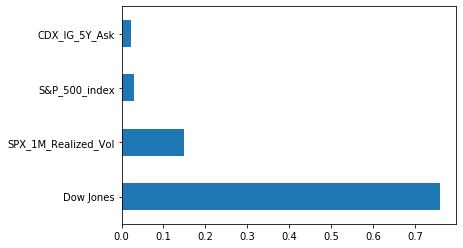

In [43]:
x1 = x_dif.iloc[:,:-1]
feat_importances = pd.Series(regr1.feature_importances_, index=x1.columns)
feat_importances.nlargest(4).plot(kind='barh')

In [72]:
import statsmodels.api as sm
x_dif = dif.iloc[:int(len(dif)*0.8),:-1]
y_dif = dif.iloc[:int(len(dif)*0.8),-1]
x_test_dif = dif.iloc[int(len(dif)*0.8):,:-1]
y_test_dif = dif.iloc[int(len(dif)*0.8):,-1]
print(x_dif.columns)
# k1 = x_dif
# k2 = y_dif
# k1_test = x_test_dif
# k2_test = y_test_dif
print(x_dif.columns)
remain_list = ['AUD_vs_JPY_Open', 'USD_vs_EUR_Open', 'USD_vs_CNY_Open',
       'CDX_IG_5Y_Ask', 'US_2Y_Yield_Open', 'US_10Y_Yield_Open',
       'S&P_500_index', 'EEM', 'SPX_1M_Realized_Vol', 'Soy_Open', 'Gold Value',
       'Oil Price', 'Total of indexpc', 'P/C Ratio of indexpc',
       'Total of equitypc', 'P/C Ratio of equitpc', 'Total of etcpc',
       'P/C Ratio of etcpc', 'VIX Put/Call Ratio', 'Total VIX Options Volume','5y5y', 'Dow Jones']
# x_dif = k1[remain_list]
# y_dif = k2
# x_test_dif = k1_test[remain_list]
# y_test_dif = k2_test
print(x_dif.columns)
print(len(x_dif.columns))
print(len(y_test_dif))

# linear model
# model = sm.OLS(k2, sm.add_constant(pd.DataFrame(k1[remain_list]))).fit()

Index(['AUD_vs_JPY_Open', 'USD_vs_EUR_Open', 'USD_vs_CNY_Open',
       'CDX_IG_5Y_Ask', 'US_2Y_Yield_Open', 'US_10Y_Yield_Open',
       'S&P_500_index', 'EEM', 'SPX_1M_Realized_Vol', 'Soy_Open', 'Gold Value',
       'Oil Price', 'Total of indexpc', 'P/C Ratio of indexpc',
       'Total of equitypc', 'P/C Ratio of equitpc', 'Total of etcpc',
       'P/C Ratio of etcpc', 'VIX Put/Call Ratio', 'Total VIX Options Volume',
       'crisis', 'war', 'credit', 'euro', 'trump', 'happy', 'federal', 'fear',
       'love', 'travel', 'restaurant', 'car', 'interest', 'debt', 'stock',
       '5y5y', 'Dow Jones'],
      dtype='object')
Index(['AUD_vs_JPY_Open', 'USD_vs_EUR_Open', 'USD_vs_CNY_Open',
       'CDX_IG_5Y_Ask', 'US_2Y_Yield_Open', 'US_10Y_Yield_Open',
       'S&P_500_index', 'EEM', 'SPX_1M_Realized_Vol', 'Soy_Open', 'Gold Value',
       'Oil Price', 'Total of indexpc', 'P/C Ratio of indexpc',
       'Total of equitypc', 'P/C Ratio of equitpc', 'Total of etcpc',
       'P/C Ratio of etcpc', '

In [71]:
def BIC(x,y,reg):
    N = len(y)
    predict = reg.predict(x)
    k = len(x.columns) + 2
    # cal rss, residual sum of squares
#     print("the predict result")
#     print(predict)
#     print(y)
    RSS = sum((predict - y)**2)
    BIC = N * np.log(RSS/N) + k * np.log(N)
    return BIC

# apply the stepwise_selection method with BIC score
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05,
                       verbose=True):    
    included = list(initial_list)
#     whole_list = list(X.columns)
#     print(whole_list)
    old_bic = np.inf
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_bic = pd.Series(index=excluded)
        # to find that if the bic decreased
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
#             print(sm.add_constant(pd.DataFrame(X[included+[new_column]])))
            new_bic[new_column] = BIC(pd.DataFrame(sm.add_constant(pd.DataFrame(X[included+[new_column]]))),y,model)
        best_bic = new_bic.min()
        if best_bic < old_bic:
            print(best_bic)
            best_feature = new_bic.idxmin()
            print(best_feature)
            included.append(best_feature)
            changed=True
            old_bic = best_bic
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
#             whole_list.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included,model
result,feature_select_model = stepwise_selection(x_dif,y_dif)
print(result,feature_select_model)
print(feature_select_model.params)
print(feature_select_model.summary())
print(feature_select_model.params)

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


-305.6720056200922
Dow Jones
-371.8610066541463
CDX_IG_5Y_Ask
-431.66529197627534
fear
-473.5490023708249
SPX_1M_Realized_Vol
-495.60599197125157
Total of indexpc
-519.9308812341151
restaurant
-532.3093735862639
Total of etcpc
-542.028768364762
trump
-575.5496547812124
stock
Drop Total of indexpc               with p-value 0.0849578
-589.5670919675409
euro
-599.4546471672253
S&P_500_index
-601.1812296570895
USD_vs_CNY_Open
['Dow Jones', 'CDX_IG_5Y_Ask', 'fear', 'SPX_1M_Realized_Vol', 'restaurant', 'Total of etcpc', 'trump', 'stock', 'euro', 'S&P_500_index', 'USD_vs_CNY_Open'] <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x1c24570cf8>
const                  5.309246e-02
Dow Jones             -6.803567e-03
CDX_IG_5Y_Ask          1.341931e-01
fear                   9.726546e-03
SPX_1M_Realized_Vol    1.462380e-01
restaurant            -2.201185e-02
Total of etcpc         3.492363e-07
trump                 -8.046386e-03
stock                  2.550414e-02
euro   

In [69]:
predict = feature_select_model.predict(sm.add_constant(pd.DataFrame(x_test_dif[result])))

In [70]:
half = 0
one = 0
print(y_test_dif.head())
y_list = y_test_dif.values.tolist()
print(len(y_list))
print(len(predict))
for i in range(1,len(predict)):
    diff = abs(y_list[i] - predict[i])
    if diff <= 0.5:
        half+=1
    if diff <= 1:
        one+=1
    half_rate = half/len(y_list)
    one_rate = one/len(y_list)

# prediction rate for dif 
print(half_rate,one_rate)

key_0
2018-02-12   -3.449998
2018-02-13   -0.640002
2018-02-14   -5.709999
2018-02-21    0.760000
2018-02-22   -1.300001
Name: VIXCLS, dtype: float64
387
387
0.4496124031007752 0.7260981912144703


In [60]:
print(len(x_test_dif))

# test code, in this case, is the current day  
half = 0
one = 0
print(y_test_dif.head())
y_list = y_test_dif.values.tolist()
print(len(y_list))
print(len(predict))
for i in range(1,len(predict)):
    diff = abs(y_list[i] - predict[i])
    if diff <= 0.5:
        half+=1
    if diff <= 1:
        one+=1
    half_rate = half/len(y_list)
    one_rate = one/len(y_list)

# prediction rate for dif 
print(half_rate,one_rate)



387
key_0
2018-02-12   -3.449998
2018-02-13   -0.640002
2018-02-14   -5.709999
2018-02-21    0.760000
2018-02-22   -1.300001
Name: VIXCLS, dtype: float64
387
387
0.4728682170542636 0.7286821705426356


In [ ]:

# return features selected by the model
def feature_selection(data):
    X = data.iloc[:,:-1]
    y = data.iloc[:,-1]
    estimator = LinearRegression()
    selector = RFECV(estimator, step=1, cv=5)
    selector = selector.fit(X, y)
    rank = selector.ranking_
    k = data.columns
    l = []
    # print out features that rfe chooses
    for i in range(len(rank)):
        if rank[i] == 1:
            l.append(k[i])
    print(l)
    # return features and selector
    # for feature selection and prediction
    return l,selector

x = df1.iloc[:int(len(df1)*0.8),:]
x_test = df1.iloc[int(len(df1)*0.8):,:-1]
y_test = df1.iloc[int(len(df1)*0.8):,-1]

# delta
# print(dif)
# x_dif = dif.iloc[:int(len(dif)*0.8),:]
# x_test_dif = dif.iloc[int(len(dif)*0.8):,:-1]
# y_test_dif = dif.iloc[int(len(dif)*0.8):,-1]

print(x_test.head())
# two data as input, one is data
l,selector = feature_selection(x_dif)
# the other one is the delta data
# delta_l, delta_selector = feature_selection(dif)
# print(len(l),len(delta_l))
print(len(l))
# print(len(dif.columns))
predict = selector.predict(x_test_dif)
print(predict)
# test code, in this case, is the current day  
half = 0
one = 0
print(y_test_dif.head())
y_list = y_test_dif.values.tolist()
for i in range(1,len(predict)):
    diff = abs(y_list[i] - predict[i])
    if diff <= 0.5:
        half+=1
    if diff <= 1:
        one+=1
    half_rate = half/len(y_list)
    one_rate = one/len(y_list)

# prediction rate for dif 
print(half_rate,one_rate)
print(len(dif.columns))
print(len(l))
print(l)
# print(selector.coef_)
print(len(x_test_dif))